# Imports

In [179]:
# For plotting
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

# For simulations
import random
random.seed(42)

# For data handling
import numpy as np
import pandas as pd

# For flattening lists through itertools.from_iterable.chain()
import itertools

# Solve the riddle

##### To know which trader presses which bulb, we need to know the number of divisors of each number between 1 and 100

In [26]:
# From https://stackoverflow.com/questions/171765/what-is-the-best-way-to-get-all-the-divisors-of-a-number
# 3rd answer

def divisors(n):
    # get factors and their counts
    factors = {}
    nn = n
    i = 2
    while i*i <= nn:
        while nn % i == 0:
            if not i in factors:
                factors[i] = 0
            factors[i] += 1
            nn //= i
        i += 1
    if nn > 1:
        factors[nn] = 1

    primes = list(factors.keys())

    # generates factors from primes[k:] subset
    def generate(k):
        if k == len(primes):
            yield 1
        else:
            rest = generate(k+1)
            prime = primes[k]
            for factor in rest:
                prime_to_i = 1
                # prime_to_i iterates prime**i values, i being all possible exponents
                for _ in range(factors[prime] + 1):
                    yield factor * prime_to_i
                    prime_to_i *= prime

    # in python3, `yield from generate(0)` would also work
    for factor in generate(0):
        yield factor

In [32]:
bulbs_switched_by_traders = {bulb: list(divisors(bulb)) for bulb in range(1,101)}

In [38]:
# Which traders press the switch of light bulb number 4. Note that the number of traders is odd: the bulb is turned on.
bulbs_switched_by_traders[4]

[1, 2, 4]

In [41]:
# Which traders press the switch of light bulb number 85. The number of traders is even. The bulb is turned off.
bulbs_switched_by_traders[85]

[1, 5, 17, 85]

In [79]:
# See which bulbs are turned on, which are turned off
bulbs_turned_on = {bulb: len(traders) % 2 == 1 for (bulb, traders) in bulbs_switched_by_traders.items()}
# x % 2 == 1 tests whether x is odd. It means "does x % 2 equal 1?", where % is the modulo operator
bulbs_turned_on

{1: True,
 2: False,
 3: False,
 4: True,
 5: False,
 6: False,
 7: False,
 8: False,
 9: True,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: False,
 16: True,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: True,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 32: False,
 33: False,
 34: False,
 35: False,
 36: True,
 37: False,
 38: False,
 39: False,
 40: False,
 41: False,
 42: False,
 43: False,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: True,
 50: False,
 51: False,
 52: False,
 53: False,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: False,
 60: False,
 61: False,
 62: False,
 63: False,
 64: True,
 65: False,
 66: False,
 67: False,
 68: False,
 69: False,
 70: False,
 71: False,
 72: False,
 73: False,
 74: False,
 75: False,
 76: False,
 77: False,
 78: False,
 79: False,
 80: False,
 81: True,
 82: False,
 83: False,
 84: False,
 85: False

In [89]:
# Finding the actual number of bulbs turned on
sum(bulbs_turned_on.values())

10

# Bringing randomness into the game

##### Now the probability to switch the light is p, where 0 ≤ p ≤ 1

In [52]:
# Instead of working on which traders presses which bulb, we count the number of traders by bulb who would press its switch
count_traders_by_bulb = {bulb: len(traders) for (bulb, traders) in bulbs_switched_by_traders.items()}

In [53]:
# How many traders press the switch of light bulb number 4 with probability p
count_traders_by_bulb[4]

3

In [54]:
# How many traders press the switch of light bulb number 85 with probability p
count_traders_by_bulb[85]

4

### Execute simulations with several values of p

##### The number of traders pressing the switch of a bulb follows a Binomial probability law, since pressing the switch follows a Bernoulli law

In [58]:
def simulate_riddle(p):
    return {bulb: sum(np.random.binomial(count_traders, p, 1)) % 2 == 1 
            for (bulb, count_traders) in count_traders_by_bulb.items()}

In [121]:
# Check that we find the same results than before when p = 1.
simulation = simulate_riddle(1)
print("Number of bulbs turned on: "+ str(sum(simulation.values())))
simulation

Number of bulbs turned on: 10


{1: True,
 2: False,
 3: False,
 4: True,
 5: False,
 6: False,
 7: False,
 8: False,
 9: True,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: False,
 16: True,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: True,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 32: False,
 33: False,
 34: False,
 35: False,
 36: True,
 37: False,
 38: False,
 39: False,
 40: False,
 41: False,
 42: False,
 43: False,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: True,
 50: False,
 51: False,
 52: False,
 53: False,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: False,
 60: False,
 61: False,
 62: False,
 63: False,
 64: True,
 65: False,
 66: False,
 67: False,
 68: False,
 69: False,
 70: False,
 71: False,
 72: False,
 73: False,
 74: False,
 75: False,
 76: False,
 77: False,
 78: False,
 79: False,
 80: False,
 81: True,
 82: False,
 83: False,
 84: False,
 85: False

In [120]:
# Check with p = 0 that all bulbs are turned OFF of course
simulation = simulate_riddle(0)
print("Number of bulbs turned on: "+ str(sum(simulation.values())))
simulation

Number of bulbs turned on: 0


{1: False,
 2: False,
 3: False,
 4: False,
 5: False,
 6: False,
 7: False,
 8: False,
 9: False,
 10: False,
 11: False,
 12: False,
 13: False,
 14: False,
 15: False,
 16: False,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: False,
 24: False,
 25: False,
 26: False,
 27: False,
 28: False,
 29: False,
 30: False,
 31: False,
 32: False,
 33: False,
 34: False,
 35: False,
 36: False,
 37: False,
 38: False,
 39: False,
 40: False,
 41: False,
 42: False,
 43: False,
 44: False,
 45: False,
 46: False,
 47: False,
 48: False,
 49: False,
 50: False,
 51: False,
 52: False,
 53: False,
 54: False,
 55: False,
 56: False,
 57: False,
 58: False,
 59: False,
 60: False,
 61: False,
 62: False,
 63: False,
 64: False,
 65: False,
 66: False,
 67: False,
 68: False,
 69: False,
 70: False,
 71: False,
 72: False,
 73: False,
 74: False,
 75: False,
 76: False,
 77: False,
 78: False,
 79: False,
 80: False,
 81: False,
 82: False,
 83: False,
 84: False,
 

In [119]:
# Test with p = 0.5, or whatever you want. For easier use of Jupyter notebook, use Ctrl + Enter to run several simulations
simulation = simulate_riddle(0.5)
print("Number of bulbs turned on: "+ str(sum(simulation.values())))
simulation

Number of bulbs turned on: 46


{1: True,
 2: True,
 3: False,
 4: True,
 5: True,
 6: False,
 7: False,
 8: False,
 9: True,
 10: True,
 11: True,
 12: False,
 13: True,
 14: False,
 15: True,
 16: True,
 17: False,
 18: False,
 19: False,
 20: False,
 21: False,
 22: False,
 23: True,
 24: False,
 25: False,
 26: True,
 27: False,
 28: True,
 29: True,
 30: True,
 31: True,
 32: False,
 33: False,
 34: True,
 35: False,
 36: True,
 37: False,
 38: True,
 39: True,
 40: False,
 41: False,
 42: True,
 43: False,
 44: False,
 45: True,
 46: True,
 47: True,
 48: False,
 49: False,
 50: False,
 51: False,
 52: False,
 53: True,
 54: True,
 55: False,
 56: False,
 57: True,
 58: True,
 59: False,
 60: False,
 61: True,
 62: True,
 63: False,
 64: False,
 65: False,
 66: False,
 67: True,
 68: True,
 69: True,
 70: True,
 71: False,
 72: True,
 73: True,
 74: False,
 75: True,
 76: True,
 77: True,
 78: False,
 79: False,
 80: True,
 81: True,
 82: False,
 83: False,
 84: False,
 85: False,
 86: False,
 87: True,
 88: Tr

In [133]:
def distribution(p, n_simulations=500):
    return pd.DataFrame([sum(simulate_riddle(p).values()) for i in range(n_simulations)])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001420A400>]], dtype=object)

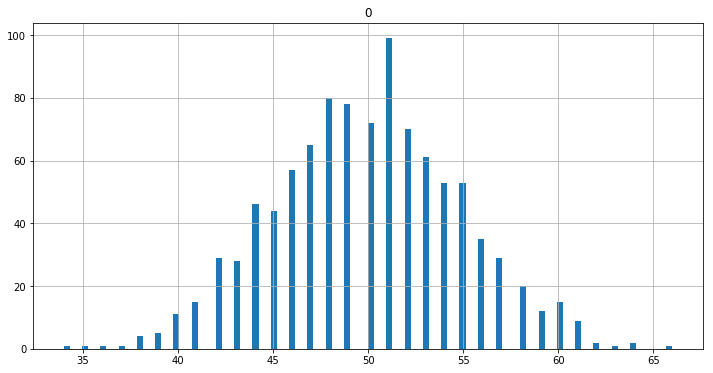

In [181]:
# Get the distribution of the number of turned on light bulbs with p = 0.5
distribution(0.5, 1000).hist(bins=100)

In [231]:
# Get the distribution with p varying from 0 to 1 incrementally. It should take less than 20 seconds
distribution_3D = [distribution(p, n_simulations=200) for p in [x/100 for x in range(101)]]
df_distribution_3D = pd.concat(distribution_3D, axis=1).T.reset_index(drop=True)

In [174]:
# Empirically, look at how the number of turned on light bulbs evolve from 
# The synthax below uses "chaining" which is made possible in pandas library
df_number_of_turned_on_bulbs = df_distribution_3D.mean(axis=1).reset_index() \
    .rename(columns={0: 'Average number of turned on light bulbs', 'index': 'p'}) \
    .assign(p = [x/100 for x in range(101)])

In [175]:
# Empirically, look at how the number of turned on light bulbs evolve from 
df_number_of_turned_on_bulbs

,p,Average number of turned on light bulbs
0,0.00,0.000
1,0.01,4.675
2,0.02,8.795
3,0.03,12.020
4,0.04,15.790
5,0.05,18.435
6,0.06,21.425
7,0.07,23.545
8,0.08,26.110
9,0.09,28.015


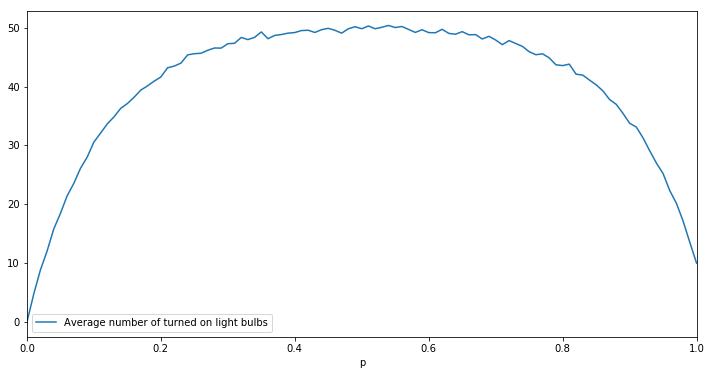

In [182]:
# Let's plot the result
df_number_of_turned_on_bulbs.plot(x='p', y='Average number of turned on light bulbs')

# Get the results mathematically

In [192]:
# If n traders should press the switch a light bulb, the probability that an even number of them press the switch is:
# 0.5 * [1 + (1 - 2p)^n]
def probability_odd_number_traders(n, p):
    return 1 - 0.5 * (1 + (1 - 2*p)**n)

In [219]:
def probabilitiy_by_bulb(p):
    return {bulb: probability_odd_number_traders(count_traders, p) 
            for (bulb, count_traders) in count_traders_by_bulb.items()}

In [224]:
# Check the probability for p = 0.5, or whatever p
probabilitiy_by_bulb(0.5)

{1: 0.5,
 2: 0.5,
 3: 0.5,
 4: 0.5,
 5: 0.5,
 6: 0.5,
 7: 0.5,
 8: 0.5,
 9: 0.5,
 10: 0.5,
 11: 0.5,
 12: 0.5,
 13: 0.5,
 14: 0.5,
 15: 0.5,
 16: 0.5,
 17: 0.5,
 18: 0.5,
 19: 0.5,
 20: 0.5,
 21: 0.5,
 22: 0.5,
 23: 0.5,
 24: 0.5,
 25: 0.5,
 26: 0.5,
 27: 0.5,
 28: 0.5,
 29: 0.5,
 30: 0.5,
 31: 0.5,
 32: 0.5,
 33: 0.5,
 34: 0.5,
 35: 0.5,
 36: 0.5,
 37: 0.5,
 38: 0.5,
 39: 0.5,
 40: 0.5,
 41: 0.5,
 42: 0.5,
 43: 0.5,
 44: 0.5,
 45: 0.5,
 46: 0.5,
 47: 0.5,
 48: 0.5,
 49: 0.5,
 50: 0.5,
 51: 0.5,
 52: 0.5,
 53: 0.5,
 54: 0.5,
 55: 0.5,
 56: 0.5,
 57: 0.5,
 58: 0.5,
 59: 0.5,
 60: 0.5,
 61: 0.5,
 62: 0.5,
 63: 0.5,
 64: 0.5,
 65: 0.5,
 66: 0.5,
 67: 0.5,
 68: 0.5,
 69: 0.5,
 70: 0.5,
 71: 0.5,
 72: 0.5,
 73: 0.5,
 74: 0.5,
 75: 0.5,
 76: 0.5,
 77: 0.5,
 78: 0.5,
 79: 0.5,
 80: 0.5,
 81: 0.5,
 82: 0.5,
 83: 0.5,
 84: 0.5,
 85: 0.5,
 86: 0.5,
 87: 0.5,
 88: 0.5,
 89: 0.5,
 90: 0.5,
 91: 0.5,
 92: 0.5,
 93: 0.5,
 94: 0.5,
 95: 0.5,
 96: 0.5,
 97: 0.5,
 98: 0.5,
 99: 0.5,
 100: 0.5}

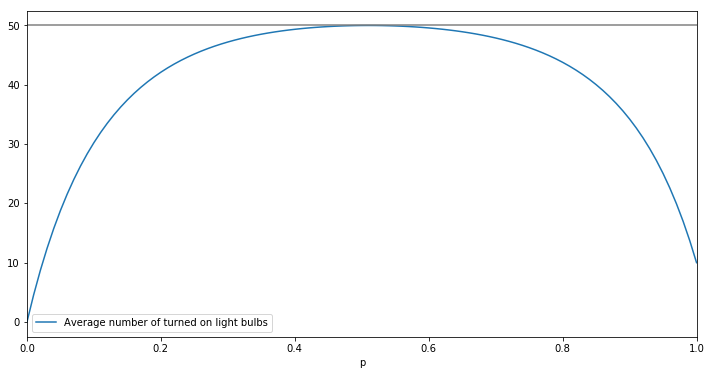

In [230]:
plot = pd.DataFrame({'p': [x/100 for x in range(101)], 
                     'Average number of turned on light bulbs': [sum(probabilitiy_by_bulb(x/100).values()) for x in range(101)]}) \
    .plot(x='p', y='Average number of turned on light bulbs')
plot.axhline(y=50, color='grey')
# The maximum number of turned on light bulbs is reached only at p = 0.5!